## My first Attempt at an ARIMA Model

I do not have any experience with creating (fitting?) ARIMA models. I went online and found <a href = "https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/">this tutorial</a> and I pretty much copied the code from it and plugged in my data.

Brownlee, Jason. “How to Create an ARIMA Model for Time Series Forecasting in Python.” Machine Learning Mastery, 1 Aug. 2018, machinelearningmastery.com/arima-for-time-series-forecasting-with-python/.

In [10]:
from statsmodels.tsa.arima_model import ARIMA
import pandas as pd
from matplotlib import pyplotot

In [8]:
df = pd.read_csv("../csv-files/Bainbridge_Departures_2013_Interpolated.csv", parse_dates = ["timestamps"], 
                 index_col = "timestamps")
series = df["seconds_late"]

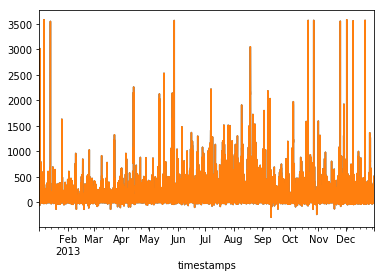

In [12]:
series.plot()
pyplot.show()

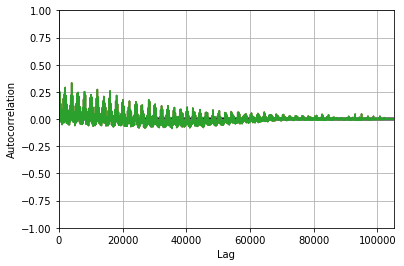

In [17]:
#from pandas.plotting import autocorrelation_plot
pd.plotting.autocorrelation_plot(series)
pyplot.show()

In [19]:
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Keith\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)
C:\Users\Keith\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\Keith\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)
C:\Users\Keith\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[in

                             ARIMA Model Results                              
Dep. Variable:         D.seconds_late   No. Observations:               105108
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -422402.239
Method:                       css-mle   S.D. of innovations             13.461
Date:                Tue, 26 Mar 2019   AIC                         844818.477
Time:                        15:07:03   BIC                         844885.416
Sample:                    01-01-2013   HQIC                        844838.746
                         - 12-31-2013                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0041      0.194     -0.021      0.983      -0.384       0.375
ar.L1.D.seconds_late     0.8928      0.003    291.129      0.000       0.887       0.899
ar.L2.D.seco

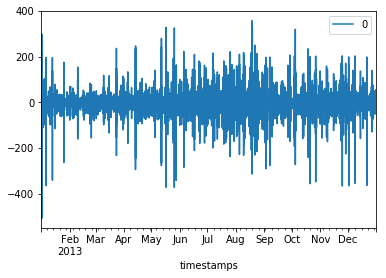

In [21]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

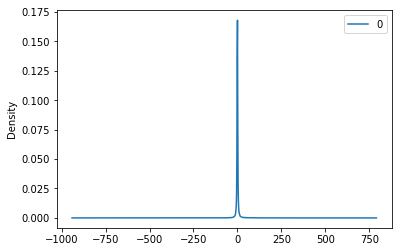

In [24]:
residuals.plot(kind="kde")
pyplot.show()

In [67]:
from sklearn.metrics import mean_squared_error
X = series.values
size = int(len(X) * .66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

#for t in range(len(test)):
for t in range(5):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted = %f \t expected = %f' % (yhat, obs))
#error = mean_squared_error(test, predictions)
#print('Test MSE: %.3f' % error)
# plot
#pyplot.plot(test)
#pyplot.plot(predictions, color='red')
#pyplot.show()

C:\Users\Keith\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Keith\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1367: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Keith\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1373: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

predicted = 95.692722 	 expected = 101.200000
predicted = 110.254932 	 expected = 112.400000
predicted = 121.454942 	 expected = 123.600000
predicted = 132.654996 	 expected = 134.800000
predicted = 143.855037 	 expected = 146.000000


Wow! Those results look promising! Especially since this is seconds delayed. Only being off by a few seconds is impressive. But I am very suspicious of this. I am completely new to all of this right now so I do not know how to verify that things are actually working correctly. One suspicion I have is that the linear interpolation is leading to overfitting. I am going to try doing this same procedure on the non linearly interpolated data and see what the results are.

In [82]:
df = pd.read_csv("../csv-files/Bainbridge_Departures_2013_with_Seconds_Late.csv", parse_dates = ["timestamps"], 
                 index_col = "timestamps")
series = df["seconds_late"].dropna()

In [84]:
X = series.values
size = int(len(X) * .66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

#for t in range(len(test)):
for t in range(5):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted = %f \t expected = %f' % (yhat, obs))

C:\Users\Keith\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1364: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Keith\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1367: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Keith\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1373: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

predicted = 76.893608 	 expected = 6.000000
predicted = 32.163176 	 expected = 42.000000
predicted = 14.993294 	 expected = 30.000000
predicted = 28.357928 	 expected = 45.000000
predicted = 27.228335 	 expected = 165.000000


Yeah ... that does not look as good.